**Este es un caso de estudio para el certificado de Business Intelligence Data Analyst Career Path de Codecademy**.  
Consiste en un **Analisis Exploratorio de Datos (EDA)**.  
Basado en datos ficticios, inspirados en datos de **Biodiversidad en Parques Nacionales de EEUU**.  
Por **Jairo Andrés Amaya Muñoz**.

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

# Planteamiento del caso: Biodiversidad en Parques Nacionales de EEUU

La finalidad del proyecto es interpretar informacion de distintas especies de animales y plantas que se pueden encontrar en los Parques Nacionales y que muchos de ellos se encuentran en peligro de extincion. 

Los Parques Nacionales son precisamente areas protegidas por su belleza geografica y naturaleza o ecosistemas unicos. Analisis como el aca propuesto, ayudan a obtener informacion util para poder cuidar y propender por la preservacion de estas especies y de la biodiversidad.


## Preguntas para el analisis

Para enfocar el analisis nos plantean las siguientes preguntas:

- &#x0031;&#xFE0F;&#x20E3; ¿Cual es la distribucion del estado de conservacion de las especies?  
- &#x0032;&#xFE0F;&#x20E3; ¿Algunos tipos de especie tiene mayor probabilidad de estar en peligro?  
- &#x0033;&#xFE0F;&#x20E3; ¿Son las diferencias entre especies y su estado de conservacion significativas?  
- &#x0034;&#xFE0F;&#x20E3; ¿Cual es el animal mas prevalente y cual es su distribucion entre los parques?  


## Datos proporcionados

  
Nos proporcionan datos contenidos en dos archivos formato csv:

El primer archivo `species_info.csv` contiene informacion de las **especies en los parques nacionales**:

| Columna | Descripción |
| :--------------- | :--------------- |
| category | Categoria taxonomica de la especie |
| scientific_name | Nombre cientifico de la especie |
| common_names | Nombres comunes de la especie |
| conservation_status | Estado de conservacion de la especie |

    
El segundo archivo `observations.csv` contiene informacion de **avistamientos de especies en los parques nacionales durante un periodo de 7 dias**:

| Columna | Descripción |
| :--------------- | :--------------- |
| scientific_name | Nombre cientifico de la especie |
| park_name | Nombre del parque nacional en que fue la especie fue avistada |
| observations |  Numero de avistamientos en un periodo de 7 dias |


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

## Importar librerias

In [1]:
import pandas as pd                   #Para trabajar con dataframes
import matplotlib.pyplot as plt       #Para graficar
import seaborn as sns                 #Una interfaz mas sofisticada y sencilla para los graficos

## Cargar los archivos de datos

In [2]:
species = pd.read_csv('species_info.csv')

observations = pd.read_csv('observations.csv')    #Quedan guardados como dos dataframes

In [3]:
species.head(10)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


In [4]:
observations.head(10)

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
5,Elymus virginicus var. virginicus,Yosemite National Park,112
6,Spizella pusilla,Yellowstone National Park,228
7,Elymus multisetus,Great Smoky Mountains National Park,39
8,Lysimachia quadrifolia,Yosemite National Park,168
9,Diphyscium cumberlandianum,Yellowstone National Park,250


## Dimensiones de los dataframes y valores unicos principales variables

In [5]:
#Dimensiones de cada df --> (filas, columnas)
print(species.shape)
print(observations.shape)

(5824, 4)
(23296, 3)


In [6]:
#Numero de especies en cada df. Igual numero de especies registradas.
print(species.scientific_name.nunique())
print(observations.scientific_name.nunique())

5541
5541


In [7]:
#Categorias o tipos de especies.
species.category.unique()

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

In [8]:
#Esta variable es categorica y ordinal.
#El nivel de amenaza a la especie (conservacion-extincion) va de menos a mas grave.
species.conservation_status.unique()

#Posteriormente se establecio que este orden:   NaN < 'Species of Concern' < 'Threatened' < 'In Recovery' < 'Endangered'.

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

In [9]:
#Estos son los parques en los que se registran los avistamientos.
observations.park_name.unique()

array(['Great Smoky Mountains National Park', 'Yosemite National Park',
       'Bryce National Park', 'Yellowstone National Park'], dtype=object)

## Revision de estadisticas resumen y revision registros 'repetidos'

**Dataframe species**

In [10]:
species.describe(include='all')    #Brinda estadisticas de resumen, en este df todas son variables categoricas.

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


In [11]:
species[species.scientific_name == 'Castor canadensis']
#Reviso el scientific_name mas frequente, para ver que el mismo animal esta registrado varias veces.

,category,scientific_name,common_names,conservation_status
49,Mammal,Castor canadensis,"American Beaver, Beaver",NaN
3050,Mammal,Castor canadensis,American Beaver,NaN
4475,Mammal,Castor canadensis,Beaver,NaN


In [12]:
species.scientific_name.value_counts()
#'Castor canadensis' no es el unico caso, otros estan tambien registrados varias veces.

Castor canadensis            3
Canis lupus                  3
Hypochaeris radicata         3
Columba livia                3
Puma concolor                3
                            ..
Carex                        1
Hexastylis shuttleworthii    1
Hexastylis heterophylla      1
Hexastylis arifolia          1
Tribulus terrestris          1
Name: scientific_name, Length: 5541, dtype: int64

In [13]:
species[species.common_names == 'Brachythecium Moss' ]
#Para la variable common_names, hay varias especies conocidas comunmente bajo el mismo nombre.

#Esto no afecta este analisis pues interesa el numero de especies determinadas por los cientificos como tal.

,category,scientific_name,common_names,conservation_status
2812,Nonvascular Plant,Brachythecium digastrum,Brachythecium Moss,NaN
2813,Nonvascular Plant,Brachythecium oedipodium,Brachythecium Moss,NaN
2814,Nonvascular Plant,Brachythecium oxycladon,Brachythecium Moss,NaN
2815,Nonvascular Plant,Brachythecium plumosum,Brachythecium Moss,NaN
2816,Nonvascular Plant,Brachythecium rivulare,Brachythecium Moss,NaN
2817,Nonvascular Plant,Brachythecium rutabulum,Brachythecium Moss,NaN
2818,Nonvascular Plant,Brachythecium salebrosum,Brachythecium Moss,NaN


**Dataframe obaservations**

In [14]:
observations.describe(include='all')   #Estadisticas de resumen del otro df, 'observations' es la unica variable numerica,
                                       #son los avistamientos.

,scientific_name,park_name,observations
count,23296,23296,23296.000000
unique,5541,4,NaN
top,Myotis lucifugus,Great Smoky Mountains National Park,NaN
freq,12,5824,NaN
mean,NaN,NaN,142.287904
std,NaN,NaN,69.890532
min,NaN,NaN,9.000000
25%,NaN,NaN,86.000000
50%,NaN,NaN,124.000000
75%,NaN,NaN,195.000000


<Axes: xlabel='observations', ylabel='Count'>

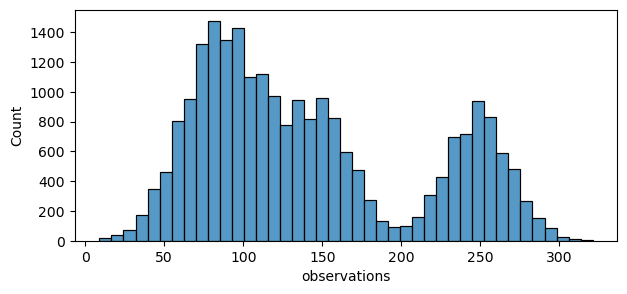

In [15]:
plt.figure(figsize=(7,3))
sns.histplot(observations.observations)    #Distribucion de la unica variable numerica. Valores fiables.

In [16]:
observations[observations.scientific_name == 'Myotis lucifugus']    #Reviso el scientific_name mas frecuente en este ddf.

#Se observan varios registros en diferentes parques (lo esperado).
#Pero tambien varios registros de una misma especie en un mismo parque (serian un registros "repetido").

,scientific_name,park_name,observations
1603,Myotis lucifugus,Great Smoky Mountains National Park,57
7094,Myotis lucifugus,Yellowstone National Park,239
8308,Myotis lucifugus,Great Smoky Mountains National Park,59
9318,Myotis lucifugus,Bryce National Park,103
9738,Myotis lucifugus,Yosemite National Park,124
10759,Myotis lucifugus,Bryce National Park,108
11395,Myotis lucifugus,Great Smoky Mountains National Park,58
12562,Myotis lucifugus,Yellowstone National Park,233
13611,Myotis lucifugus,Yosemite National Park,134
15865,Myotis lucifugus,Bryce National Park,87


In [17]:
observations.scientific_name.value_counts()
#Las especies con mas registros que parques nos aseguran que hay registros "repetidos", misma especie en un mismo parque.
#Pueden agregarse ya que los considero validos.

Myotis lucifugus                        12
Puma concolor                           12
Hypochaeris radicata                    12
Holcus lanatus                          12
Streptopelia decaocto                   12
                                        ..
Packera dimorphophylla var. paysonii     4
Smilax bona-nox                          4
Chondestes grammacus                     4
Leymus triticoides                       4
Dichanthelium depauperatum               4
Name: scientific_name, Length: 5541, dtype: int64

 ## Revision por valores nulos

In [18]:
species.info()      #En el df species hay valores nulos en la variable 'conservation_status', alli son mayoria.
                    #En las demas variables los no-null son igual al total de registros.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [19]:
observations.info()    #No hay valores nulos en el df observations (igual no-null al total de registros).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


Resumen de la exploracion inicial de los datos proporcionados:



- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

# Observaciones de exploracion inicial

  
Con estos primeros pasos de la exploracion se tiene una buena idea del contenido de los datasets proporcinados. Se puede decir que los datasets son fiables y vienen "bastante limpios", los nombres de las variables vienen bien dados, en minusculas y uniformes, los valores de las variables categoricas vienen bien categorizados sin errores de tipeo y la variable numerica no tiene outliers que parezcan errados. Entonces se describen definitivamente las variables centrales al analisis.

**Descripcion de variables:**

> | **Variable** | **Tipo de Variable** | **Valores** |
> | :--------------- | :--------------- | :--------------- |
> | Especie, nombre cientifico | Categorica nominal | 5541 especies. |
> | Categoria de especie | Categorica nominal | Mamiferos, Pajaros, Reptiles, Anfibios, Peces, Plantas Vasculares y Plantas No Vasculares. |
> | Parque Natural | Categorica nominal | Great Smoky Mountains National Park, Yosemite National Park, Bryce National Park y Yellowstone National Park. |
> | Estado de Conservacion | Categorica ordinal | NaN < 'Species of Concern' < 'Threatened' < 'In Recovery' < 'Endangered'. |
> | # de Avistamientos (7 dias) | Numerica discreta | En un rango de 9 a 321, en promedio de a 142,3 por registro. |


Cabe añadir que la variable de Estado de Conservacion, se considera categorica ordinal porque indica el nivel de amenaza de la especie en cuanto a la conservacion o posible extincion de la especie. Esta variable es critica para el analisis pues es sobre la que se deben direccionar los esfuerzos. El orden de las categorias fue asumido mirando una comparacion de las clasificaciones oficiales principales, como lo son NatureServe Rank y IUCN Red List Category.

Link: [Comparison-of-NatureServe-Ranks-and-IUCN-Red-List-Categories](https://www.researchgate.net/figure/Comparison-of-NatureServe-Ranks-and-IUCN-Red-List-Categories_fig1_359830951)


## Acciones de limpieza

Hechas todas las inspecciones anteriores y con claridad de lo que se tiene, lo siguiente es realizar unas acciones de limpieza para poder finalmente usar los datos con fiabilidad y de acuerdo a la necesidad. Concretando lo anterior, las unicas 3 observaciones que se hacieron en los primeros pasos de inspeccion fueron registros repetidos cada uno con sus particularidades en cada dataset y valores nulos, se detallan las observaciones y los pasos a realizar:


> - Hay valores repetidos en el dataframe de **species**, puesto que hay 5541 especies pero 5824 registros (5,1% de mas). Arriba se evidencio en un ejemplo, una misma especie con 3 registros con diferentes valores para 'common_name'.
> - *Estos registros repetidos se deben unificar en solo uno.*

> - En el dataframe de **species** la variable de **'conservation_status'** tiene valores nulos que se asume son valores estructuralmente faltantes, ya que quieren decir algo. Como son mayoria, con alta seguridad se asume que son especies que no tienen ningun peligro de extincion, son conservados.
>  - *Estos valores se remplazaran por 'No Concern' inspirados en las clasificciones de riego de extincion anteriormente citadas. Este es un nombre de categoria util y acorde.*

> - Hay valores repetidos en el dataframe de **observations**, puesto que hay 23296 registros de un maximo de 4 registros de especie (1 por parque), es decir 22164 (5,1% de mas). Arriba se evidencio una misma especie en un mismo parque con mas de un registro.
> - *Estos registros repetidos se asume que son validos (hechos en distintos puntos del tiempo) dentro el periodo de 7 dias, por eso se agregaran siendo sumados.*

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

## Conversion de valores nulos

In [20]:
species.conservation_status.unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

In [21]:
#Llenamos los valores nulos de 'conservation_status' con 'No Concern' para ser claros con el significado
#de estos datos estructuralmente faltantes. Es comprensible y no alarma a un lector.
species.conservation_status.fillna('No Concern', inplace=True) #inplace=True modifica el df directamente
species.conservation_status.unique()

array(['No Concern', 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

In [22]:
species.conservation_status.value_counts() #La mayoria de especies no estan en riesgo de extincion.

No Concern            5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: conservation_status, dtype: int64

## Limpieza de registros "repetidos"

**Dataframe species**

In [23]:
#species_norep es el nuevo df que excluye registros repetidos.
species_norep = species.groupby([ 'category', 'scientific_name', 'conservation_status']).count().reset_index()
species_norep = species_norep[[ 'category', 'scientific_name', 'conservation_status']] #Excluyo count() de common_names
species_norep.conservation_status.value_counts()

#Despues de agrupar quedamos con 5543 registros, dos mas que el numero de especies unicas, deben haber 2 valores sobrantes.

No Concern            5363
Species of Concern     151
Endangered              15
Threatened              10
In Recovery              4
Name: conservation_status, dtype: int64

In [24]:
species_norep.scientific_name.value_counts()
#Vemos dos especies que aparecen 2 veces

Oncorhynchus mykiss                   2
Canis lupus                           2
Acris crepitans crepitans             1
Malacothrix floccifera                1
Malva parviflora                      1
                                     ..
Calycadenia oppositifolia             1
Calycadenia mollis                    1
Caltha leptosepala                    1
Calopogon tuberosus var. tuberosus    1
Zizia trifoliata                      1
Name: scientific_name, Length: 5541, dtype: int64

In [25]:
species_norep[species_norep.scientific_name == 'Oncorhynchus mykiss']
#La primera

,category,scientific_name,conservation_status
664,Fish,Oncorhynchus mykiss,No Concern
665,Fish,Oncorhynchus mykiss,Threatened


In [26]:
species_norep[species_norep.scientific_name == 'Canis lupus']
#La segunda

#los dos registros "repetidos": misma categoria, misma especie, mismo nombre comun, diferente estado de conservacion.
#En el primer caso nos quedaremos con Threatened y en el segundo con Endangered, conviene y no se corre riesgo de errar.

,category,scientific_name,conservation_status
705,Mammal,Canis lupus,Endangered
706,Mammal,Canis lupus,In Recovery


In [27]:
#Borro las filas con el indice 664 y 705, los unicos repetidos/duplicados que quedaban.
species_norep = species_norep.drop([664, 705])
species_norep
#Quedan 5541 filas, el numero de especies que hay registro.

,category,scientific_name,conservation_status
0,Amphibian,Acris crepitans crepitans,No Concern
1,Amphibian,Ambystoma maculatum,No Concern
2,Amphibian,Ambystoma mavortium melanostictum,No Concern
3,Amphibian,Ambystoma opacum,No Concern
4,Amphibian,Ambystoma talpoideum,No Concern
...,...,...,...
5538,Vascular Plant,Zigadenus venenosus var. gramineus,No Concern
5539,Vascular Plant,Zigadenus venenosus var. venenosus,No Concern
5540,Vascular Plant,Zizia aptera,No Concern
5541,Vascular Plant,Zizia aurea,No Concern


In [28]:
species_norep.shape
#Quedan 5541 registros, antes de limpiar repetidos habian 5824.
#species_norep despues de agrupados los registros repetidos y excluidos 2 mas tambien repetidos,
#queda sin variable common_name, para consultar los nombres comunes acudir al df original: species.

(5541, 3)

**Dataframe observations**

In [29]:
#observations_norep es el nuevo df que excluye registros repetidos.
observations_norep = observations.groupby(['scientific_name', 'park_name'])['observations'].sum().reset_index()
#Al agruparse por especie y parque, se suman y queda el df sin registros repetidos.
observations_norep.park_name.value_counts()   #En los 4 parques nacionales hay registros de las 5541 especies. 22164 registros.

Bryce National Park                    5541
Great Smoky Mountains National Park    5541
Yellowstone National Park              5541
Yosemite National Park                 5541
Name: park_name, dtype: int64

In [62]:
observations_norep

,scientific_name,park_name,observations
0,Abies bifolia,Bryce National Park,109
1,Abies bifolia,Great Smoky Mountains National Park,72
2,Abies bifolia,Yellowstone National Park,215
3,Abies bifolia,Yosemite National Park,136
4,Abies concolor,Bryce National Park,83
...,...,...,...
22159,Zygodon viridissimus,Yosemite National Park,159
22160,Zygodon viridissimus var. rupestris,Bryce National Park,102
22161,Zygodon viridissimus var. rupestris,Great Smoky Mountains National Park,102
22162,Zygodon viridissimus var. rupestris,Yellowstone National Park,237


In [30]:
observations_norep.shape
#Quedan 22164 registros, antes de limpiar repetidos habian 23296.

(22164, 3)

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
  
# Solucion a preguntas de analisis y visualizaciones

Con los datos preparados y completamente limpios se contestaran las preguntas de analisis planteadas al principio en el planteamiento. Con tablas y visualizaciones se dan a entender los detalles de los datos, extraemos la informacion que se busca. 
  
En particular el analisis es para concentrar los esfuerzos en preservar las especies que habitan en algunos de los parques nacionales de EEUU y con ello la biodiversidad.
  
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

## Visualizacion de categorias de Estado de Conservacion y de Especies 
(Pregunta &#x0031;&#xFE0F;&#x20E3;) 

<Axes: xlabel='conservation_status', ylabel='count'>

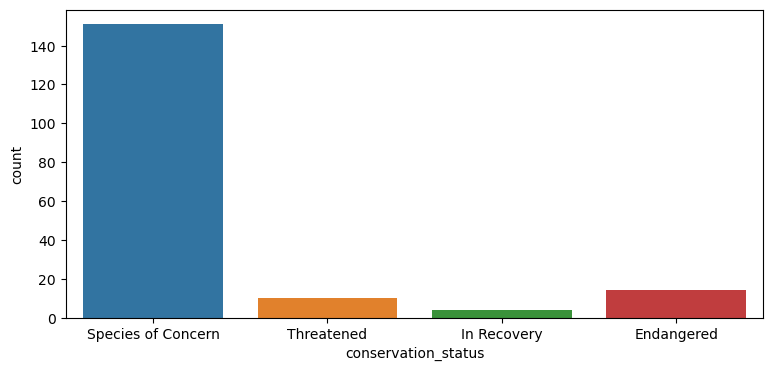

In [32]:
#Se crea un df de species (sin repeticiones) excluyendo las especies con valor 'No Concern' en la 
#variable 'conservation_status' porque esta barra diminutiza a las de otras categorias.

species_risk = species_norep[species_norep.conservation_status != 'No Concern']

plt.figure(figsize=(9,4))
sns.countplot(x=species_risk.conservation_status, order = ['Species of Concern', 'Threatened', 'In Recovery', 'Endangered'])
#Se ordenaron las columnas para en orden de riesgo. Pero no de forma definitiva se hace solo en el grafico.

Se observa que la mayoria de las epecies con estado de conservacion en riesgo (Excluyendo 'No Concern'), lo estan en la categoria 'Species of Concern', afortunadamente la menos grave en cuanto a riesgo de extincion.

Las categorias que deben preocuparnos son las de 'Threatened' y 'Endangered' puesto que significan que estas especies enfrentan un alto riesgo de extincion. 

Por otro lado, que hayan especies 'In Recovery' es una buena noticia, que puede indicar que los esfuerzos de conservacion en los parques nacionales funcionan.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Amphibian'),
  Text(1, 0, 'Bird'),
  Text(2, 0, 'Fish'),
  Text(3, 0, 'Mammal'),
  Text(4, 0, 'Nonvascular Plant'),
  Text(5, 0, 'Reptile'),
  Text(6, 0, 'Vascular Plant')])

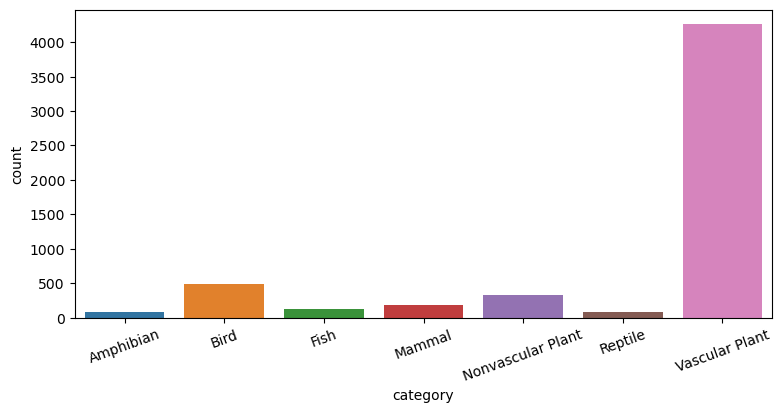

In [33]:
plt.figure(figsize=(9,4))
sns.countplot(x=species_norep.category)
plt.xticks(rotation=20)
#Hay muchas mas plantas vasculares que cualquier otro tipo de animal o planta
#species.category[species.category == 'Bird'].count() es igual a 521

Acerca de las categorias de especies cabe decir que hay un numero muy alto de especies de plantas vasculares, mas de 8 veces que las demas categorias (por encima de 4000 al lado de la siguiente mas frecuente, los pajaros, que son 521).

Luego hay mayor numero de especies de pajaros, plantas no-vasculares y mamiferos.

## Visualizacion de Estado de Conservacion y Categoria de Especie
(Pregunta &#x0032;&#xFE0F;&#x20E3;)
  
Despues de visualizar las especies por **estado de conservacion** y por **categoria de especie** (amenazada), se explora la relacion entre estas dos variables. Para eso usaremos barras apiladas dado que las dos son variables categoricas.

La variable de estado de conservacion es variable categorica y ademas ordinal, por lo que ordenamos sus valores(categorias) para que esto sea un elemento que ayude a visualizar el riesgo que tienen algunas especies.

In [56]:
#Para las barras apiladas (stacked bar plot), requerimos crear una tabla "pivoteada" (df de 2 dimensiones) donde se vea
#el conteo de acuerdo a la categoria de especie (columna) y al estado de conservacion (fila).

#Se agrupan los datos de una tabla estandar ("tidy, limpia"), en base a el df species_risk (excluye 'No Concern').
#Se cuentan los registros de cada grupo (se cuenta porque estamos en especies segun estado de conservacion).
#Se incluyen los indices en la tabla (nombres de los "grupos").
#Se "pivotea" la tabla porque en este formato la recibe la funcion .plot.


pre_cons_vs_cat = species_risk.groupby(['category', 'conservation_status']).scientific_name.count().\
    reset_index().pivot(index='category', columns='conservation_status', values='scientific_name')

In [57]:
#Como la tabla tiene valores de categoryuna variable ordinal como columnas, se ordenan las columnas para mostrar el orden.
#Este orden permanece en esta tabla 2d que se usa en los dos siguientes graficos
cons_vs_cat = pre_cons_vs_cat[['Species of Concern', 'Threatened', 'In Recovery', 'Endangered']] 
cons_vs_cat

conservation_status,Species of Concern,Threatened,In Recovery,Endangered
category,,,,
Amphibian,4.0,2.0,NaN,1.0
Bird,68.0,NaN,3.0,4.0
Fish,4.0,4.0,NaN,3.0
Mammal,22.0,2.0,1.0,5.0
Nonvascular Plant,5.0,NaN,NaN,NaN
Reptile,5.0,NaN,NaN,NaN
Vascular Plant,43.0,2.0,NaN,1.0


In [58]:
#Este df de 2 dimensiones se transpone para utilizar en otra visualizacion
cat_vs_cons = cons_cat.transpose()
cat_vs_cons   #se ve que prevalecio el orden de category, antes en columnas ahora en filas.

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Species of Concern,4.0,68.0,4.0,22.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Endangered,1.0,4.0,3.0,5.0,NaN,NaN,1.0


Text(0, 0.5, 'count')

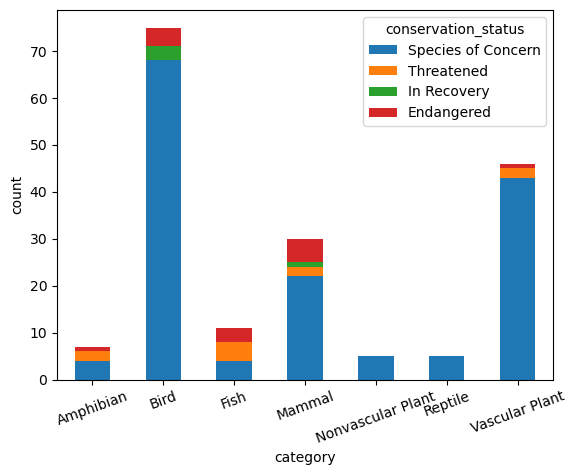

In [59]:
cons_vs_cat.plot(kind='bar', stacked=True)
plt.xticks(rotation=20)
plt.ylabel('count')
#Grafico de la relacion category y conservation_status

Podemos ver que la categoria de especie con mas especies en riesgo es la de Pajaros, la segunda Plantas Vasculares y la tercera los Mamiferos. Recordemos que las Plantas Vasculares y despues los Pajaros eran las categorias con mayor numero de especies.

**Los Pajaros estan sobrerepresentados en especies en riesgo de extincion, de acuerdo a su estado de conservacion.**
Vale la pena reocrdar que hay 5541 especies registradas y este grafico de cuenta va hasta las 70.

Text(0, 0.5, 'count')

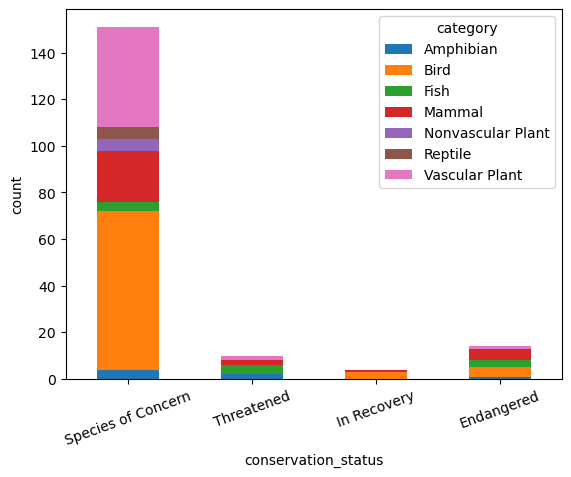

In [60]:
cat_vs_cons.plot(kind='bar', stacked=True)
plt.xticks(rotation=20)
plt.ylabel('count')
#Grafico de la relacion conservation_status y category.

Como se dijo, esta variable de Estado de Conservacion, se ordenó. La mayoria son Especies Preocupantes ('Species of Concern'), esto se habia visto antes. Tambien como antes, se observa que los Pajaros y las Plantas Vasculares "sobresalen" en Especies Preocupantes.

Por otro lado se ve que **en especies en Verdadero Peligro ('Endangered'), sobresalen los Mamiferos, Pajaros y Peces. Y los Anfibios, se ven, a pesar de que sabemos que son poco numero de especies.**

Pensando en hipotesis acerca de porque las especies estan en peligro, esto puede ser por distintas causas, algunos pajaros recorren vastas areas mas alla de estos parques, los mamiferos pueden ser objetivo de caza, los peces y anfibios pueden ver contaminados sus afluentes, y en cuanto a plantas no vasculares las razones pueden ser mas complejas. Estos elementos han de tenerse en cuenta para analisis mas especializados pero que pueden partir de estos datos.

## Animal mas prevalente y estado de conservacion 
Pregunta &#x0034;&#xFE0F;&#x20E3;

Para determinar el animal mas prevalente ya contamos con los datos agrupados y sin repeticiones, pero no los tenemos agrupados con avistamientos sumados sin distincion de parque. Ademas de esto incluiremos la variable category en el dataframe de observation a traves de un join (o merge como se llama la funcion) para poder ver en la tabla de las especies mas prevalentes, a que categoria de especie pertenece cada una y hacerse a una idea rapidamente. Sera necesario agruparar nuevamente los datos para tener los avistamientos sin distincion de parque pudiendo saber la prevalencia total por especie.
Luego usaremos los datos desagrupados para ver la distribucion de la especie.

In [61]:
observations_merge = pd.merge(observations_norep, species_norep, on=['scientific_name', 'scientific_name'], how='left')\
[['category', 'scientific_name', 'park_name', 'observations']]
#Se crea el df de observaciones y se le añade 'category' haciendo un join (funcion merge)
#y se seleccionan solo las columnas de interes. Se tiene por categoria de especie, especie, parque y numero de observaciones
observations_merge

,category,scientific_name,park_name,observations
0,Vascular Plant,Abies bifolia,Bryce National Park,109
1,Vascular Plant,Abies bifolia,Great Smoky Mountains National Park,72
2,Vascular Plant,Abies bifolia,Yellowstone National Park,215
3,Vascular Plant,Abies bifolia,Yosemite National Park,136
4,Vascular Plant,Abies concolor,Bryce National Park,83
...,...,...,...,...
22159,Nonvascular Plant,Zygodon viridissimus,Yosemite National Park,159
22160,Nonvascular Plant,Zygodon viridissimus var. rupestris,Bryce National Park,102
22161,Nonvascular Plant,Zygodon viridissimus var. rupestris,Great Smoky Mountains National Park,102
22162,Nonvascular Plant,Zygodon viridissimus var. rupestris,Yellowstone National Park,237


Si los datos no estuvieran sin repeticiones habrian relaciones de muchos a muchos, generando el producto cartesiano al hacer join (funcion merge) entre los dos df.

In [50]:
observations_merge_total = observations_merge.groupby(['category', 'scientific_name'])['observations'].sum()\
.reset_index().sort_values('observations', ascending=False)
#Se agrupa por especie (y categoria), ignorando el parque en donde se registraron las observaciones.
#Se suman las observaciones por especie, y se ordenan para ver la especie mas prevalente.

observations_merge_total
#La especie mas prevalente es el Pajaro Streptopelia decaocto, con 1785 observaciones en los parques nacionales.

,category,scientific_name,observations
507,Bird,Streptopelia decaocto,1785
3188,Vascular Plant,Holcus lanatus,1780
706,Mammal,Castor canadensis,1725
3260,Vascular Plant,Hypochaeris radicata,1720
807,Mammal,Puma concolor,1711
...,...,...,...
72,Amphibian,Rana sierrae,144
657,Fish,Noturus baileyi,143
537,Bird,Vermivora bachmanii,141
705,Mammal,Canis rufus,137


In [63]:
species[species.scientific_name == 'Streptopelia decaocto']
#Como se habia dicho, consultar el df original de species para ver los nombres comunes de las especies.
#Nombre comun: Eurasian Collared-Dove o Tórtola turca en español.

,category,scientific_name,common_names,conservation_status
3077,Bird,Streptopelia decaocto,Eurasian Collared-Dove,No Concern
3140,Bird,Streptopelia decaocto,"Eurasian Collared Dove, Eurasian Collared-Dove",No Concern
4514,Bird,Streptopelia decaocto,Eurasian Collared Dove,No Concern


El **Pajaro Streptopelia decaocto** es la especie mas prevalente en los parques nacionales, es conocido como **Tortola turca** (en español), **fue avistado 1785 veces** en un periodo de 7 dias en los parques nacionales de Estados Unidos.

<img src="https://raw.githubusercontent.com/jairo-andres-a-m/Proyecto-Codecademy-BI-DA/main/streptopelia-pajaro.JPG" width="400" height="400" />

In [51]:
p = observations.park_name.unique()
print([park for park in p])
#Parques nacionales incluidos en los datasets proveidos.

['Great Smoky Mountains National Park', 'Yosemite National Park', 'Bryce National Park', 'Yellowstone National Park']


In [52]:
#Distribucion de la especie, prevalencia por avistamientos en cada parque.
streptopelia = observations_merge[observations_merge.scientific_name == 'Streptopelia decaocto']
streptopelia

,category,scientific_name,park_name,observations
19972,Bird,Streptopelia decaocto,Bryce National Park,301
19973,Bird,Streptopelia decaocto,Great Smoky Mountains National Park,256
19974,Bird,Streptopelia decaocto,Yellowstone National Park,771
19975,Bird,Streptopelia decaocto,Yosemite National Park,457


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Bryce National Park'),
  Text(1, 0, 'Great Smoky Mountains National Park'),
  Text(2, 0, 'Yellowstone National Park'),
  Text(3, 0, 'Yosemite National Park')])

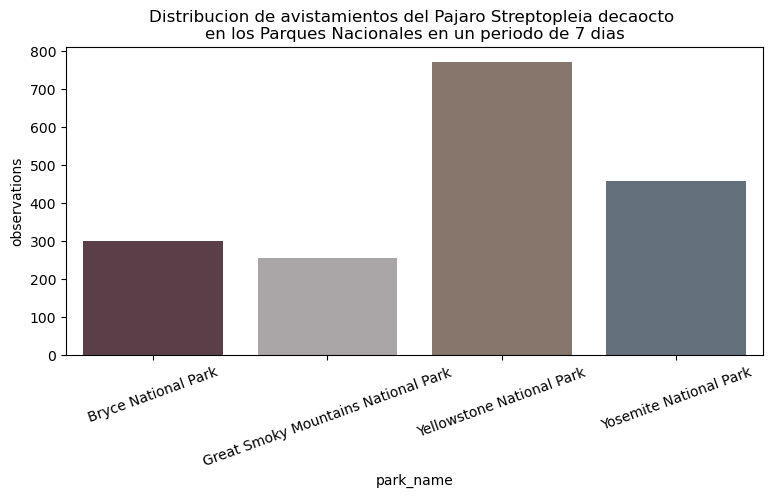

In [53]:
sns.color_palette("rocket")
plt.figure(figsize=(9,4))
paleta_pajaro = ["#5e3b47","#aba4a6","#8a7567","#607180"] #colores "como los del pajaro"
sns.barplot(x='park_name', y='observations', data=streptopelia, palette=paleta_pajaro)
plt.title('Distribucion de avistamientos del Pajaro Streptopleia decaocto \nen los Parques Nacionales en un periodo de 7 dias')
plt.xticks(rotation=20)

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
&#x0033;&#xFE0F;&#x20E3; ¿Son las diferencias entre especies y su estado de conservacion significativas?  
 ... prueba estadistica para determinar si las diferencias son significativas.